## 生成各自动售货机画像

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#设置当前工作目录
os.chdir('E:/Taidy')
##读取附件
app1 = pd.read_csv('Data/附件1.csv', engine = 'python', encoding = 'gbk')
app2 = pd.read_csv('Data/附件2.csv', sep=',',engine = 'python', encoding='gbk') 

#主键合并app1和app2
app_merge = pd.merge(app1, app2, left_on='商品', right_on = '商品')

In [15]:
#日期格式转换
app_merge['支付时间'] = pd.to_datetime(app_merge['支付时间'], errors = 'coerce', format = '%Y-%m-%d')

In [16]:
#数据清洗，去缺失值
print('缺失值数量:\n', app_merge.isnull().sum())

缺失值数量:
 订单号     0
设备ID    0
应付金额    0
实际金额    0
商品      0
支付时间    1
地点      0
状态      0
提现      0
大类      0
二级类     0
dtype: int64


In [17]:
#数据清洗，去缺失值
print('去除重复值之前： ', app_merge.shape)
app_merge = app_merge.dropna()
print('去除重复值之后： ', app_merge.shape)

去除重复值之前：  (70680, 11)
去除重复值之后：  (70679, 11)


In [18]:
#数据清洗，去重
app_merge.duplicated().sum()

0

In [19]:
#数据清洗，去重
print('去除重复值之前： ', app_merge.shape)
app_merge = app_merge.drop_duplicates()
print('去除重复值之后： ', app_merge.shape)

去除重复值之前：  (70679, 11)
去除重复值之后：  (70679, 11)


In [20]:
#添加'month'列
app_merge['月份'] = app_merge['支付时间'].dt.month

### 3-1 给出每台售货机饮料类商品的标签，保存在csv文件中

In [63]:
app_merge1 = app_merge.iloc[(app_merge['大类']=='饮料').values, :]

In [64]:
retail_a = app_merge1.loc[(app_merge1['地点'] == 'A'), :]
retail_b = app_merge1.loc[(app_merge1['地点'] == 'B'), :]
retail_c = app_merge1.loc[(app_merge1['地点'] == 'C'), :]
retail_d = app_merge1.loc[(app_merge1['地点'] == 'D'), :]
retail_e = app_merge1.loc[(app_merge1['地点'] == 'E'), :]

In [65]:
retail_a.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类,二级类
1831,DD201708167493763456228120661,E43A6E078A04172,3.0,3.0,600ml可口可乐,2017-03-29 04:54:00,A,已出货未退款,已提现,饮料,碳酸饮料
1844,DD2017081674930274480845587777,E43A6E078A04172,0.0,0.0,600ml可口可乐,2017-04-19 21:03:00,A,已出货未退款,已提现,饮料,碳酸饮料
1867,DD201708167493126146773740987,E43A6E078A04172,3.0,3.0,600ml可口可乐,2017-05-21 07:52:00,A,已出货未退款,已提现,饮料,碳酸饮料
1874,DD201708167493137051674121136,E43A6E078A04172,3.5,3.5,600ml可口可乐,2017-05-23 08:00:00,A,已出货未退款,已提现,饮料,碳酸饮料
1885,DD201708167493686343614538648,E43A6E078A04172,3.5,3.5,600ml可口可乐,2017-05-30 08:21:00,A,已出货未退款,已提现,饮料,碳酸饮料


In [66]:
groupby_a = retail_a.groupby('商品').count()
groupby_a

,订单号,设备ID,应付金额,实际金额,支付时间,地点,状态,提现,大类,二级类
商品,,,,,,,,,,
100g*5瓶益力多,40,40,40,40,40,40,40,40,40,40
13g雀巢咖啡1+2特浓,4,4,4,4,4,4,4,4,4,4
145ml旺仔牛奶盒装,131,131,131,131,131,131,131,131,131,131
145ml旺仔牛奶罐装,2,2,2,2,2,2,2,2,2,2
150g健能酸奶原味,28,28,28,28,28,28,28,28,28,28
180ml雀巢咖啡罐装,22,22,22,22,22,22,22,22,22,22
205g伊利安慕希原味,53,53,53,53,53,53,53,53,53,53
205ml安慕希蓝莓味,7,7,7,7,7,7,7,7,7,7
250ML东鹏特饮,16,16,16,16,16,16,16,16,16,16


In [79]:
os.chdir('E:/Taidy/Data')
#定义打标签函数
def NoteTags(data,down, up, filename):
    #按商品进行分组并计数
    grouped = data.groupby('商品').count()
    
    grouped['销量占比'] = grouped['订单号'] / len(grouped)
    
    #按‘销量占比’的值排序
    grouped = grouped.sort_values(by = '销量占比')
    
    #计算分位数
    per_20 = grouped.loc[:, '销量占比'].quantile(down)
    per_80 = grouped.loc[:, '销量占比'].quantile(up)
    
    #根据销量占比与分位数的比较，定义销量标签
    for i in grouped.index:
        #print(i)
        if (grouped.loc[i, '销量占比'] < per_20):
            grouped.loc[i, '销量标签'] = '滞销'
        elif (grouped.loc[i, '销量占比'] > per_80):
            grouped.loc[i, '销量标签'] = '热销'
        else:
            grouped.loc[i, '销量标签'] = '正常'
    
    #删除不必要的列
    grouped.drop(['订单号','设备ID','应付金额','实际金额','支付时间','地点','状态','提现','大类','二级类','销量占比'],
                 axis=1,inplace=True)
    
    grouped.to_csv(filename, index = True, encoding = 'gbk')
    return grouped

    
grouped_a = NoteTags(retail_a, 0.20, 0.80, 'task3/task3-1A.csv')
grouped_b = NoteTags(retail_b, 0.20, 0.80, 'task3/task3-1B.csv')
grouped_c = NoteTags(retail_c, 0.20, 0.80, 'task3/task3-1C.csv')
grouped_d = NoteTags(retail_d, 0.20, 0.80, 'task3/task3-1D.csv')
grouped_e = NoteTags(retail_e, 0.20, 0.80, 'task3/task3-1E.csv')

In [80]:
grouped_a

,销量标签
商品,
小茗同学冷泡茶（乳酸菌味）,滞销
脉动（椰子菠萝口味）,滞销
芦荟汁,滞销
安慕希酸奶,滞销
145ml旺仔牛奶罐装,滞销
娃哈哈红枣酸奶,滞销
商品1,滞销
健能酸奶,滞销
250ml香满楼纯牛奶,滞销


In [149]:
#设置能反映销量标签的频数
def num_set(data):
    for i in data.index:
        #print(i)
        if (data.loc[i, '销量标签'] == '滞销' ):
            data.loc[i, 'num'] = 10
        elif (data.loc[i, '销量标签'] == '正常'):
            data.loc[i, 'num'] = 40
        else:
            data.loc[i, 'num'] = 70
num_set(grouped_a)
num_set(grouped_b)
num_set(grouped_c)
num_set(grouped_d)
num_set(grouped_e)

In [150]:
grouped_a

,销量标签,num
商品,,
小茗同学冷泡茶（乳酸菌味）,滞销,10.0
脉动（椰子菠萝口味）,滞销,10.0
芦荟汁,滞销,10.0
安慕希酸奶,滞销,10.0
145ml旺仔牛奶罐装,滞销,10.0
娃哈哈红枣酸奶,滞销,10.0
商品1,滞销,10.0
健能酸奶,滞销,10.0
250ml香满楼纯牛奶,滞销,10.0


### 3-2 生成自动售货机画像

In [151]:
# 绘制词云
# from scipy.misc import imread
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# back_pic = imageio.imread("a.jpg")  # 设置背景图片

# wc = WordCloud( font_path = 'C:\\Windows\\Fonts\\simhei.ttf',#设置字体  
#                 background_color = "white", #背景颜色   
#                 mask = back_pic,#设置背景图片  
#                 max_font_size = 200, #字体最大值  
#                 random_state = 42,  
#                 )


In [168]:
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def DrawWordCloud(data, background, font, output):
            
    ss = pd.Series(data.loc[:, 'num'], index = data.index)
    
    back_pic = imageio.imread(background)  # 设置背景图片

    wc = WordCloud( font_path = font,#设置字体  
                    background_color = "white", #背景颜色   
                    mask = back_pic,  #设置背景图片  
                    max_font_size = 200,  #字体最大值  
                    min_font_size = 10, #显示的最小的字体大小
                    random_state = 42
                    )
    
    gar_wordcloud = wc.fit_words(ss)  # num是由频数构成的Series的形式，且商品作为索引
    plt.figure(figsize=(16,8))
    plt.imshow(gar_wordcloud)
    plt.axis('off') 
    plt.show() 
    wc.to_file(output) # 保存图片



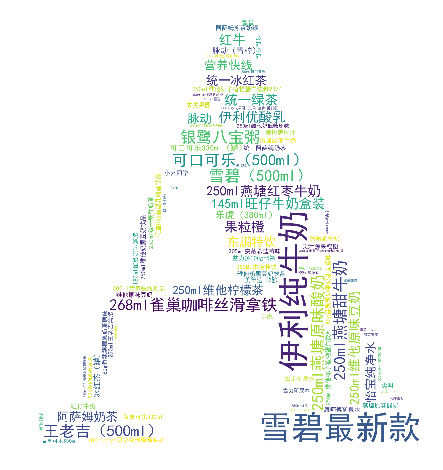

In [178]:
os.chdir('E:/Taidy')
DrawWordCloud(grouped_a, 'temp/a.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'temp/A售货机画像.png')

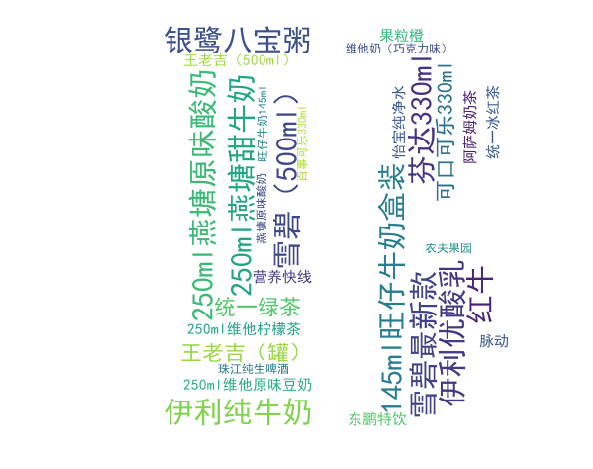

In [172]:
DrawWordCloud(grouped_b, 'temp/b.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'temp/B售货机画像.png')

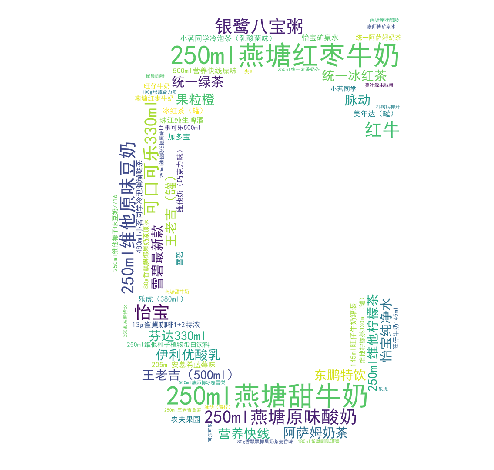

In [173]:
DrawWordCloud(grouped_c, 'temp/c.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'temp/C售货机画像.png')

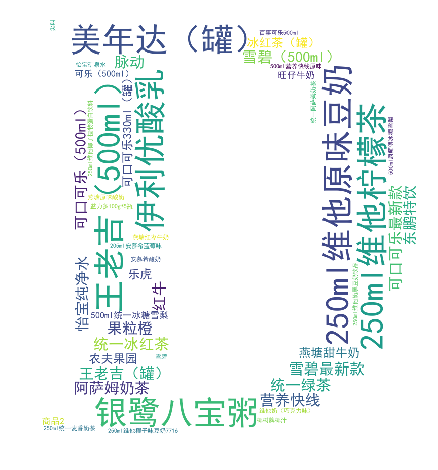

In [174]:
DrawWordCloud(grouped_d,  'temp/d.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'temp/D售货机画像.png')

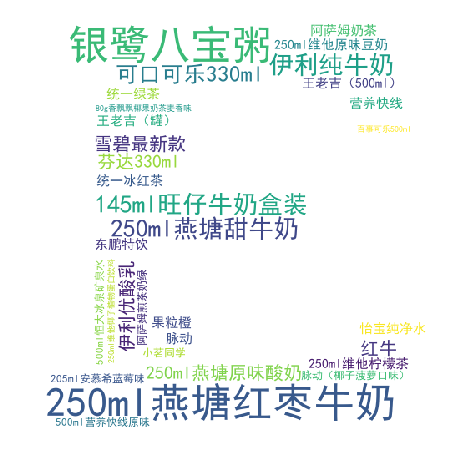

In [175]:
DrawWordCloud(grouped_e, 'temp/e.jpg', 
             'C:\\Windows\\Fonts\\simhei.ttf', 
             'temp/E售货机画像.png')